<a href="https://colab.research.google.com/github/ShaunakNandi/EIP4.0/blob/master/wk2/Assignment_2_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dropout, Activation, GlobalAveragePooling2D, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


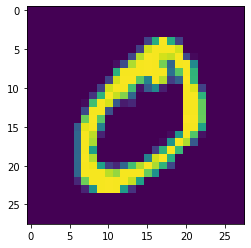

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [7]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint

model = Sequential()
 
model.add(Convolution2D(16, (3,3), activation='relu', use_bias=False, input_shape=(28,28,1), name='input')) #26
model.add(BatchNormalization(name='BN1'))
model.add(Dropout(0.1, name='drop1'))
model.add(Convolution2D(16, (3,3), activation='relu', use_bias=False, name='layer1')) #24
model.add(BatchNormalization(name='BN2'))
model.add(Dropout(0.1, name='drop2'))

model.add(Convolution2D(16, (1,1), activation='relu', use_bias=False, name='trans1')) #24
model.add(BatchNormalization(name='BN3'))
model.add(MaxPooling2D(2,2, name='MP1')) #12

model.add(Convolution2D(16, (3,3), activation='relu', use_bias=False, name='layer2')) #10
model.add(BatchNormalization(name='BN4'))
model.add(Dropout(0.1, name='drop3'))
model.add(Convolution2D(16, (3,3), activation='relu', use_bias=False, name='layer3')) #8
model.add(BatchNormalization(name='BN5'))
model.add(Dropout(0.1, name='drop4'))

model.add(MaxPooling2D(2,2, name='MP2'))#4

model.add(Convolution2D(32, (3,3), activation='relu', use_bias=False, name='layer4')) #2
model.add(BatchNormalization(name='BN7'))
model.add(Dropout(0.1, name='drop5'))

model.add(Convolution2D(10, (1,1), use_bias=False, activation='relu'))
model.add(GlobalAveragePooling2D(data_format='channels_last', name='output'))
'''
model.add(BatchNormalization(name='BN8'))
model.add(Dropout(0.1, name='drop6'))
model.add(Convolution2D(10, 2), use_bias=False, )
model.add(Flatten())
'''
model.add(Activation('softmax', name='softmax'))

model.summary()

_optimizer_ = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
             optimizer=_optimizer_,
             metrics=['accuracy'])

monitor_val_acc = ModelCheckpoint(filepath='/content/mnist.h5', monitor='val_acc', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
mod = model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1, callbacks=[monitor_val_acc], validation_data=(X_test, Y_test))












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Conv2D)               (None, 26, 26, 16)        144       
_________________________________________________________________
BN1 (BatchNormalization)     (None, 26, 26, 16)        64        
_________________________________________________________________
drop1 (Dropout)              (None, 26, 26, 16)        0         
_________________________________________________________________
layer1 (Conv2D)              (None, 24, 24, 16)        2304      
_________________________________________________________________
BN2 (BatchNormalization)     (None, 24, 24, 16)        64        
_________________________________________________________________
drop2 (Dropout)              (None, 24, 24, 16)        0   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.




Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 29s 477us/step - loss: 0.1722 - acc: 0.9505 - val_loss: 0.0475 - val_acc: 0.9860
Epoch 2/20
60000/60000 [==============================] - 27s 444us/step - loss: 0.0650 - acc: 0.9800 - val_loss: 0.0327 - val_acc: 0.9899
Epoch 3/20
60000/60000 [==============================] - 28s 461us/step - loss: 0.0523 - acc: 0.9838 - val_loss: 0.0314 - val_acc: 0.9899
Epoch 4/20
60000/60000 [==============================] - 28s 462us/step - loss: 0.0467 - acc: 0.9853 - val_loss: 0.0249 - val_acc: 0.9925
Epoch 5/20
60000/60000 [==============================] - 27s 456us/step - loss: 0.0422 - acc: 0.9865 - val_loss: 0.0248 - val_acc: 0.9914
Epoch 6/20
60000/60000 [==============================] - 27s 455us/step - loss: 0.0387 - acc: 0.9880 - val_loss: 0.0232 - val_acc: 0.9917
Epoch 7/20
60000/60000 [==============================] - 27s 456us/step - loss: 0.0361 - acc: 0.9884 - val_loss: 

In [9]:
'''
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])
'''

"\nfrom keras.optimizers import Adam\nfrom keras.callbacks import LearningRateScheduler\ndef scheduler(epoch, lr):\n  return round(0.003 * 1/(1 + 0.319 * epoch), 10)\n\nmodel.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])\n\nmodel.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])\n"

In [10]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.019193828565673903, 0.9935]
